In [2]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv('spotifytoptracks.csv', index_col= 0)
df.head(50)

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.3340,171.005,200040,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.5400,98.078,209755,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.6420,116.971,196653,Hip-Hop/Rap
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.8940,121.962,176219,Dance/Electronic
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.6790,123.950,183290,Nu-disco
5,DaBaby,BLAME IT ON BABY,ROCKSTAR (feat. Roddy Ricch),7ytR5pFWmSjzHJIeQkgog4,0.690,0.746,11,-7.956,0.24700,0.1640,0.000000,0.1010,0.4970,89.977,181733,Hip-Hop/Rap
6,Harry Styles,Fine Line,Watermelon Sugar,6UelLqGlWMcVH1E5c4H7lY,0.816,0.548,0,-4.209,0.12200,0.0465,0.000000,0.3350,0.5570,95.390,174000,Pop
7,Powfu,death bed (coffee for your head),death bed (coffee for your head),7eJMfftS33KTjuF7lTsMCx,0.431,0.726,8,-8.765,0.73100,0.1350,0.000000,0.6960,0.3480,144.026,173333,Hip-Hop/Rap
8,Trevor Daniel,Nicotine,Falling,2rRJrJEo19S2J82BDsQ3F7,0.430,0.784,10,-8.756,0.12300,0.0364,0.000000,0.0887,0.2360,127.087,159382,R&B/Hip-Hop alternative
9,Lewis Capaldi,Divinely Uninspired To A Hellish Extent,Someone You Loved,7qEHsqek33rTcFNT9PFqLf,0.405,0.501,1,-5.679,0.75100,0.0319,0.000000,0.1050,0.4460,109.891,182161,Alternative/Indie


### Handling missing values:

In [9]:
missing_values = df.isna().sum()
missing_values
# There are no missing values in the data.

artist              0
album               0
track_name          0
track_id            0
energy              0
danceability        0
key                 0
loudness            0
acousticness        0
speechiness         0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
genre               0
dtype: int64


In [14]:
# The duplicate in this data woould the same artist and song. We check if there are any duplicates:
duplicate_rows = df[df.duplicated(subset=["artist", "track_name"])]
duplicate_rows
# There are no duplicates in the data. 

artist                0
album                 0
track_name            0
track_id              0
energy              0.0
danceability        0.0
key                   0
loudness            0.0
acousticness        0.0
speechiness         0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
duration_ms           0
genre                 0
dtype: object

In [18]:
# Treating outliers:
columns_with_outliers = ["energy", "danceability", "loudness", "acousticness", "speechiness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms"]

# Define the lower and upper percentiles for capping
lower_percentile = 0.05  
upper_percentile = 0.95  

# Apply Winsorization to cap outliers in the specified columns
for column in columns_with_outliers:
    lower_bound = df[column].quantile(lower_percentile)
    upper_bound = df[column].quantile(upper_percentile)
    
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
df.head(50)

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730000,0.514000,1,-5.934000,0.010928,0.059800,0.000095,0.089700,0.334000,167.510525,200040.00,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593000,0.825000,6,-6.401000,0.688000,0.098800,0.000161,0.170000,0.540000,98.078000,209755.00,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586000,0.878183,10,-6.687000,0.104000,0.055900,0.000000,0.531390,0.642000,116.971000,196653.00,Hip-Hop/Rap
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721000,0.785000,8,-5.457000,0.014900,0.050600,0.003009,0.285000,0.877025,121.962000,176219.00,Dance/Electronic
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793000,0.793000,11,-4.521000,0.012300,0.083000,0.000000,0.095100,0.679000,123.950000,183290.00,Nu-disco
5,DaBaby,BLAME IT ON BABY,ROCKSTAR (feat. Roddy Ricch),7ytR5pFWmSjzHJIeQkgog4,0.690000,0.746000,11,-7.956000,0.247000,0.164000,0.000000,0.101000,0.497000,89.977000,181733.00,Hip-Hop/Rap
6,Harry Styles,Fine Line,Watermelon Sugar,6UelLqGlWMcVH1E5c4H7lY,0.816000,0.548000,0,-4.209000,0.122000,0.046500,0.000000,0.335000,0.557000,95.390000,174000.00,Pop
7,Powfu,death bed (coffee for your head),death bed (coffee for your head),7eJMfftS33KTjuF7lTsMCx,0.431000,0.726000,8,-8.765000,0.731000,0.135000,0.000000,0.531390,0.348000,144.026000,173333.00,Hip-Hop/Rap
8,Trevor Daniel,Nicotine,Falling,2rRJrJEo19S2J82BDsQ3F7,0.430000,0.784000,10,-8.756000,0.123000,0.036400,0.000000,0.088700,0.236000,127.087000,159382.00,R&B/Hip-Hop alternative
9,Lewis Capaldi,Divinely Uninspired To A Hellish Extent,Someone You Loved,7qEHsqek33rTcFNT9PFqLf,0.405000,0.501000,1,-5.679000,0.751000,0.032877,0.000000,0.105000,0.446000,109.891000,182161.00,Alternative/Indie


In [23]:
#How many observations are there in this dataset?
num_observations = len(df)
print('There are',num_observations,'observations in this data.')

There are 50 observations in this data


In [25]:
#How many features this dataset has?
num_features = len(df.columns)
print('There are',num_features,'features in this data.')

There are 16 features in this data


In [31]:
# Which of the features are categorical?
categorical_features = df.select_dtypes(include='object').columns
categorical_features_str = str(categorical_features)
categorical_features_str = categorical_features_str[categorical_features_str.find('[')+1:categorical_features_str.rfind(']')]
print('Categorical features are:', categorical_features_str)

Categorical features are: 'artist', 'album', 'track_name', 'track_id', 'genre'


In [33]:
# Which of the features are numeric?
numeric_features = df.select_dtypes(include='number').columns
numeric_features_str = str(numeric_features)
numeric_features_str = numeric_features_str[numeric_features_str.find('[')+1:numeric_features_str.rfind(']')]
print('Numeric features are:', numeric_features_str)

Numeric features are: 'energy', 'danceability', 'key', 'loudness', 'acousticness',
       'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'


In [36]:
# Are there any artists that have more than 1 popular track? If yes, which and how many?
popular_artists = df['artist'].value_counts()
popular_artists = popular_artists[popular_artists > 1]
print('These artists have more than one popular song:',popular_artists)

These artists have more than one song: artist
Billie Eilish    3
Dua Lipa         3
Travis Scott     3
Justin Bieber    2
Harry Styles     2
Lewis Capaldi    2
Post Malone      2
Name: count, dtype: int64


In [40]:
# Who was the most popular artist?
most_popular_artist = popular_artists.idxmax()
most_popular_tracks = popular_artists.max()
artists_with_same_popularity = popular_artists[popular_artists == most_popular_tracks]
print("Artists with the most osngs in the top 50:")
for artist in artists_with_same_popularity.index:
    print(artist)

Artists with the most osngs in the top 50:
Billie Eilish
Dua Lipa
Travis Scott


In [44]:
# How many artists in total have their songs in the top 50?
total_artists = len(df['artist'].unique())
total_artists
print('There are',total_artists,'different artists in the TOP 50.')

There are 40 different artists in the TOP 50.


In [45]:
# Are there any albums that have more than 1 popular track? If yes, which and how many?
popular_albums = df['album'].value_counts()
popular_albums = popular_albums[popular_albums > 1]
print("Albums with More than 1 Popular Track:\n", popular_albums)

Albums with More than 1 Popular Track:
 album
Future Nostalgia        3
Hollywood's Bleeding    2
Fine Line               2
Changes                 2
Name: count, dtype: int64


In [46]:
# How many albums in total have their songs in the top 50?
total_albums = len(df['album'].unique())
print("Total Albums with Songs in the Top 50:", total_albums)

Total Albums with Songs in the Top 50: 45


In [61]:
# Which tracks have a danceability score above 0.7?
high_danceability_tracks = df[df['danceability'] > 0.7]
print("Tracks with Danceability > 0.7:\n", high_danceability_tracks['track_name'])

Tracks with Danceability > 0.7:
 1                                      Dance Monkey
2                                           The Box
3                             Roses - Imanbek Remix
4                                   Don't Start Now
5                      ROCKSTAR (feat. Roddy Ricch)
7                  death bed (coffee for your head)
8                                           Falling
10                                             Tusa
13                                  Blueberry Faygo
14                         Intentions (feat. Quavo)
15                                     Toosie Slide
17                                           Say So
18                                         Memories
19                       Life Is Good (feat. Drake)
20                 Savage Love (Laxed - Siren Beat)
22                                      Breaking Me
24                              everything i wanted
25                                         Señorita
26                             

In [63]:
# Which tracks have their loudness above -5?
high_loudness_tracks = df[df['loudness'] > -5]
print("Tracks with Loudness > -5:\n", high_loudness_tracks['track_name'])

Tracks with Loudness > -5:
 4                                   Don't Start Now
6                                  Watermelon Sugar
10                                             Tusa
12                                          Circles
16                                    Before You Go
17                                           Say So
21                                        Adore You
23                           Mood (feat. iann dior)
31                                   Break My Heart
32                                         Dynamite
33                 Supalonely (feat. Gus Dapperton)
35                  Rain On Me (with Ariana Grande)
37    Sunflower - Spider-Man: Into the Spider-Verse
38                                            Hawái
39                                          Ride It
40                                       goosebumps
43                                          Safaera
48                                         Physical
49                                  

In [65]:
# Which tracks have their loudness below -8?
low_loudness_tracks = df[df['loudness'] < -8]
print("Tracks with Loudness < -8:\n", low_loudness_tracks['track_name'])

Tracks with Loudness < -8:
 7                   death bed (coffee for your head)
8                                            Falling
15                                      Toosie Slide
20                  Savage Love (Laxed - Siren Beat)
24                               everything i wanted
26                                           bad guy
36                               HIGHEST IN THE ROOM
44                              lovely (with Khalid)
47    If the World Was Ending - feat. Julia Michaels
Name: track_name, dtype: object


In [67]:
# Which track is the longest?
longest_track = df[df['duration_ms'] == df['duration_ms'].max()]
print("Longest Track:\n", longest_track[['track_name', 'duration_ms']])

Longest Track:
       track_name  duration_ms
15  Toosie Slide    246324.15
43       Safaera    246324.15
49    SICKO MODE    246324.15


In [70]:
# Which track is the shortest?
shortest_track = df[df['duration_ms'] == df['duration_ms'].min()]
print("Shortest Track:\n", shortest_track[['track_name', 'duration_ms']])

Shortest Track:
                                        track_name  duration_ms
23                         Mood (feat. iann dior)    158040.25
37  Sunflower - Spider-Man: Into the Spider-Verse    158040.25
39                                        Ride It    158040.25


In [71]:
# Which genre is the most popular?
most_popular_genre = df['genre'].value_counts().idxmax()
print("Most Popular Genre:", most_popular_genre)

Most Popular Genre: Pop


In [73]:
# Which genres have just one song on the top 50?
genres_with_one_song = df['genre'].value_counts()[df['genre'].value_counts() == 1]
print("Genres with Just One Song:\n", genres_with_one_song)

Genres with Just One Song:
 genre
Nu-disco                              1
R&B/Hip-Hop alternative               1
Pop/Soft Rock                         1
Pop rap                               1
Hip-Hop/Trap                          1
Dance-pop/Disco                       1
Disco-pop                             1
Dreampop/Hip-Hop/R&B                  1
Alternative/reggaeton/experimental    1
Chamber pop                           1
Name: count, dtype: int64


In [74]:
# How many genres in total are represented in the top 50?
total_genres = len(df['genre'].unique())
print("Total Genres Represented:", total_genres)

Total Genres Represented: 16


In [79]:
# Which features are strongly positively correlated?
numeric_features = df.select_dtypes(include='number')
# Calculate the correlation matrix for numeric features
corr_matrix = numeric_features.corr()
positive_corr = corr_matrix.unstack().sort_values().drop_duplicates()
strong_pos_corr = positive_corr[(positive_corr > 0.5) & (positive_corr < 1)]

print("Strongly Positively Correlated Features:\n", strong_pos_corr)

Strongly Positively Correlated Features:
 loudness  energy    0.776981
dtype: float64


In [81]:
# Which features are strongly positively correlated?
numeric_features = df.select_dtypes(include='number')
# Calculate the correlation matrix for numeric features
corr_matrix = numeric_features.corr()
negative_corr = corr_matrix.unstack().sort_values().drop_duplicates()
strong_neg_corr = negative_corr[(negative_corr < -0.5) & (negative_corr > -1)]

print("Strongly Negatively Correlated Features:\n", strong_neg_corr)

Strongly Negatively Correlated Features:
 energy  acousticness   -0.626122
dtype: float64


In [83]:
# Which features are strongly positively correlated?
numeric_features = df.select_dtypes(include='number')
# Calculate the correlation matrix for numeric features
corr_matrix = numeric_features.corr()
uncorrelated_features = corr_matrix.unstack().sort_values().drop_duplicates()
uncorrelated_features = uncorrelated_features[uncorrelated_features == 0]
print("Uncorrelated Features:\n", uncorrelated_features)

Uncorrelated Features:
 Series([], dtype: float64)


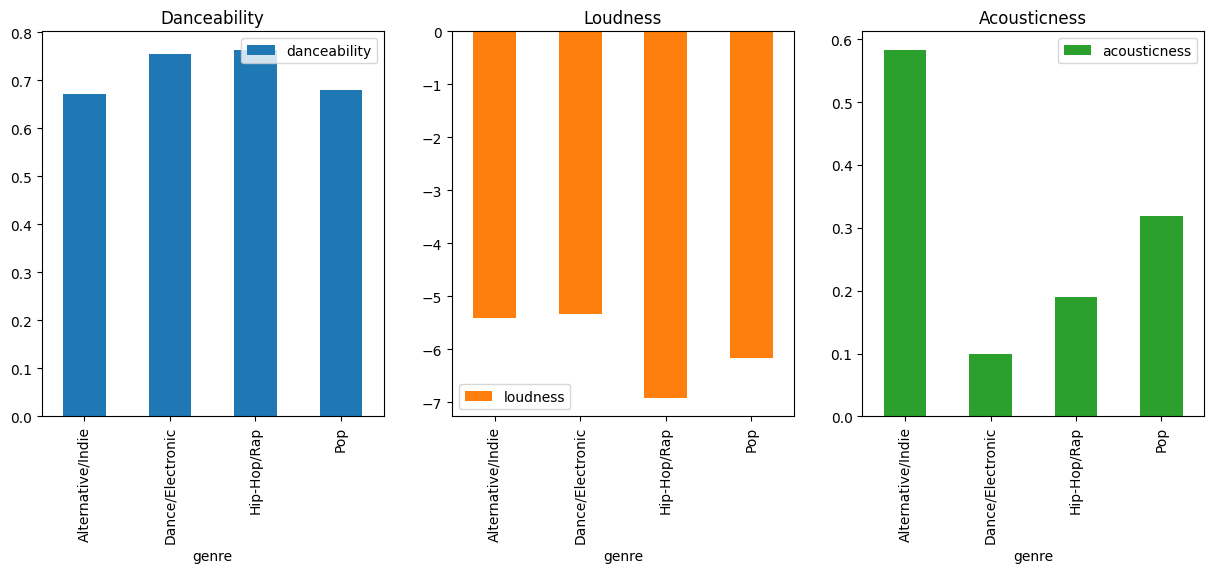

In [84]:
import matplotlib.pyplot as plt

# Filter the dataset for the specified genres
selected_genres = ['Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie']
filtered_data = df[df['genre'].isin(selected_genres)]

# Group by genre and calculate the mean scores
genre_scores = filtered_data.groupby('genre').agg({'danceability': 'mean', 'loudness': 'mean', 'acousticness': 'mean'})

# Plot the results
genre_scores.plot(kind='bar', subplots=True, layout=(1, 3), figsize=(15, 5), title=['Danceability', 'Loudness', 'Acousticness'])
plt.show()

https://github.com/KevinNourian/Top-50-Spotify-Tracks-2020/blob/main/Top50SpotifyTracks2020.ipynb